In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Files don't exist, splitting...
Splitting data into train, test and validation sets...
Data split successfully!
Saving split data...
Split data saved successfully!


In [6]:
def build_alex_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                96,
                (11, 11),
                strides=(4, 4),
                activation="relu",
                input_shape=preprocessing_utils.images.shape[1:],
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(256, (5, 5), activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(256, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(
                4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(
                4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    model.summary()

    return model

In [7]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [8]:
alex_net_wrapper.build_model(
    build_fn=build_alex_net, model_name=alex_net_wrapper.model_name
)

Building model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                         

In [9]:
alex_net_wrapper.train_and_save_model_and_history()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 48.3859 - accuracy: 0.0574
Epoch 1: val_loss improved from inf to 31.63033, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 12s 508ms/step - loss: 48.3859 - accuracy: 0.0574 - val_loss: 31.6303 - val_accuracy: 0.0461 - lr: 0.0010
Epoch 2/100
8/9 [=========================>....] - ETA: 0s - loss: 24.0907 - accuracy: 0.0828
Epoch 2: val_loss improved from 31.63033 to 15.24096, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 332ms/step - loss: 23.8806 - accuracy: 0.0837 - val_loss: 15.2410 - val_accuracy: 0.0553 - lr: 0.0010
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 11.9589 - accuracy: 0.1080
Epoch 3: val_loss improved from 15.24096 to 8.45038, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 344ms/step - loss: 11.8733 - accuracy: 0.1085 - val_loss: 8.4504 - val_accuracy: 0.0829 - lr: 0.0010
Epoch 4/100
8/9 [=========================>....] - ETA: 0s - loss: 7.1469 - accuracy: 0.1140
Epoch 4: val_loss improved from 8.45038 to 5.93681, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 324ms/step - loss: 7.1144 - accuracy: 0.1136 - val_loss: 5.9368 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 5/100
8/9 [=========================>....] - ETA: 0s - loss: 5.2648 - accuracy: 0.1157
Epoch 5: val_loss improved from 5.93681 to 4.81145, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 328ms/step - loss: 5.2488 - accuracy: 0.1155 - val_loss: 4.8115 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 6/100
8/9 [=========================>....] - ETA: 0s - loss: 4.2937 - accuracy: 0.1293
Epoch 6: val_loss improved from 4.81145 to 4.25026, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 293ms/step - loss: 4.2846 - accuracy: 0.1309 - val_loss: 4.2503 - val_accuracy: 0.0369 - lr: 0.0010
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss: 3.7617 - accuracy: 0.1462
Epoch 7: val_loss improved from 4.25026 to 3.83651, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 310ms/step - loss: 3.7567 - accuracy: 0.1459 - val_loss: 3.8365 - val_accuracy: 0.0737 - lr: 0.0010
Epoch 8/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4137 - accuracy: 0.1605
Epoch 8: val_loss improved from 3.83651 to 3.66244, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 3.4130 - accuracy: 0.1613 - val_loss: 3.6624 - val_accuracy: 0.0507 - lr: 0.0010
Epoch 9/100
8/9 [=========================>....] - ETA: 0s - loss: 3.2065 - accuracy: 0.1813
Epoch 9: val_loss improved from 3.66244 to 3.34719, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 303ms/step - loss: 3.2062 - accuracy: 0.1810 - val_loss: 3.3472 - val_accuracy: 0.1244 - lr: 0.0010
Epoch 10/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0909 - accuracy: 0.1922
Epoch 10: val_loss improved from 3.34719 to 3.25555, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 366ms/step - loss: 3.0890 - accuracy: 0.1934 - val_loss: 3.2555 - val_accuracy: 0.1567 - lr: 0.0010
Epoch 11/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0441 - accuracy: 0.1943
Epoch 11: val_loss did not improve from 3.25555
9/9 [==============================] - 1s 147ms/step - loss: 3.0408 - accuracy: 0.1958 - val_loss: 3.2941 - val_accuracy: 0.1244 - lr: 0.0010
Epoch 12/100
8/9 [=========================>....] - ETA: 0s - loss: 2.9485 - accuracy: 0.2115
Epoch 12: val_loss did not improve from 3.25555
9/9 [==============================] - 1s 146ms/step - loss: 2.9490 - accuracy: 0.2102 - val_loss: 3.4206 - val_accuracy: 0.0829 - lr: 0.0010
Epoch 13/100
8/9 [=========================>....] - ETA: 0s - loss: 2.9243 - accuracy: 0.2105
Epoch 13: val_loss improved from 3.25555 to 3.18647, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 2.9224 - accuracy: 0.2114 - val_loss: 3.1865 - val_accuracy: 0.1705 - lr: 0.0010
Epoch 14/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8262 - accuracy: 0.2333
Epoch 14: val_loss did not improve from 3.18647
9/9 [==============================] - 1s 146ms/step - loss: 2.8260 - accuracy: 0.2342 - val_loss: 3.3635 - val_accuracy: 0.1060 - lr: 0.0010
Epoch 15/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8474 - accuracy: 0.2412
Epoch 15: val_loss did not improve from 3.18647
9/9 [==============================] - 1s 146ms/step - loss: 2.8416 - accuracy: 0.2425 - val_loss: 3.2924 - val_accuracy: 0.1382 - lr: 0.0010
Epoch 16/100
8/9 [=========================>....] - ETA: 0s - loss: 2.7439 - accuracy: 0.2592
Epoch 16: val_loss improved from 3.18647 to 3.15184, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 357ms/step - loss: 2.7436 - accuracy: 0.2583 - val_loss: 3.1518 - val_accuracy: 0.1336 - lr: 0.0010
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 2.6748 - accuracy: 0.2824
Epoch 17: val_loss improved from 3.15184 to 3.11507, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 6s 688ms/step - loss: 2.6748 - accuracy: 0.2824 - val_loss: 3.1151 - val_accuracy: 0.1751 - lr: 0.0010
Epoch 18/100
9/9 [==============================] - ETA: 0s - loss: 2.6501 - accuracy: 0.2953
Epoch 18: val_loss did not improve from 3.11507
9/9 [==============================] - 2s 198ms/step - loss: 2.6501 - accuracy: 0.2953 - val_loss: 3.2207 - val_accuracy: 0.1106 - lr: 0.0010
Epoch 19/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5966 - accuracy: 0.3173
Epoch 19: val_loss did not improve from 3.11507
9/9 [==============================] - 2s 195ms/step - loss: 2.5995 - accuracy: 0.3145 - val_loss: 3.2728 - val_accuracy: 0.1567 - lr: 0.0010
Epoch 20/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5297 - accuracy: 0.3365
Epoch 20: val_loss did not improve from 3.11507
9/9 [==============================] - 2s 196ms/step - loss: 2.5269 - accuracy: 0.3369 - val_loss: 3.5445 - val_accuracy: 0.1336 - lr: 0.0010
Epoch 

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 308ms/step - loss: 1.5226 - accuracy: 0.6025 - val_loss: 3.0910 - val_accuracy: 0.2673 - lr: 3.1250e-05
Epoch 35/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5172 - accuracy: 0.6003
Epoch 35: val_loss improved from 3.09100 to 3.03375, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.5115 - accuracy: 0.6020 - val_loss: 3.0338 - val_accuracy: 0.2719 - lr: 3.1250e-05
Epoch 36/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5024 - accuracy: 0.6020
Epoch 36: val_loss did not improve from 3.03375
9/9 [==============================] - 1s 146ms/step - loss: 1.5055 - accuracy: 0.6001 - val_loss: 3.0524 - val_accuracy: 0.2627 - lr: 3.1250e-05
Epoch 37/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4904 - accuracy: 0.6070
Epoch 37: val_loss improved from 3.03375 to 2.96426, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 305ms/step - loss: 1.4908 - accuracy: 0.6067 - val_loss: 2.9643 - val_accuracy: 0.2903 - lr: 3.1250e-05
Epoch 38/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4746 - accuracy: 0.6158
Epoch 38: val_loss did not improve from 2.96426
9/9 [==============================] - 1s 156ms/step - loss: 1.4707 - accuracy: 0.6162 - val_loss: 2.9740 - val_accuracy: 0.2627 - lr: 3.1250e-05
Epoch 39/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4537 - accuracy: 0.6277
Epoch 39: val_loss improved from 2.96426 to 2.91164, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.4585 - accuracy: 0.6271 - val_loss: 2.9116 - val_accuracy: 0.2857 - lr: 3.1250e-05
Epoch 40/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4370 - accuracy: 0.6267
Epoch 40: val_loss improved from 2.91164 to 2.90808, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 311ms/step - loss: 1.4398 - accuracy: 0.6261 - val_loss: 2.9081 - val_accuracy: 0.2673 - lr: 3.1250e-05
Epoch 41/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4235 - accuracy: 0.6277
Epoch 41: val_loss improved from 2.90808 to 2.87007, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 295ms/step - loss: 1.4237 - accuracy: 0.6281 - val_loss: 2.8701 - val_accuracy: 0.2627 - lr: 3.1250e-05
Epoch 42/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4189 - accuracy: 0.6340
Epoch 42: val_loss improved from 2.87007 to 2.79310, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 302ms/step - loss: 1.4174 - accuracy: 0.6351 - val_loss: 2.7931 - val_accuracy: 0.3041 - lr: 3.1250e-05
Epoch 43/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4194 - accuracy: 0.6258
Epoch 43: val_loss did not improve from 2.79310
9/9 [==============================] - 1s 154ms/step - loss: 1.4189 - accuracy: 0.6264 - val_loss: 2.8543 - val_accuracy: 0.2903 - lr: 3.1250e-05
Epoch 44/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3961 - accuracy: 0.6447
Epoch 44: val_loss improved from 2.79310 to 2.69025, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 304ms/step - loss: 1.3982 - accuracy: 0.6436 - val_loss: 2.6902 - val_accuracy: 0.3041 - lr: 3.1250e-05
Epoch 45/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3932 - accuracy: 0.6363
Epoch 45: val_loss did not improve from 2.69025
9/9 [==============================] - 1s 146ms/step - loss: 1.3885 - accuracy: 0.6371 - val_loss: 2.8138 - val_accuracy: 0.2949 - lr: 3.1250e-05
Epoch 46/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3628 - accuracy: 0.6507
Epoch 46: val_loss did not improve from 2.69025
9/9 [==============================] - 1s 147ms/step - loss: 1.3678 - accuracy: 0.6475 - val_loss: 2.7046 - val_accuracy: 0.3088 - lr: 3.1250e-05
Epoch 47/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3547 - accuracy: 0.6555
Epoch 47: val_loss did not improve from 2.69025
9/9 [==============================] - 1s 147ms/step - loss: 1.3558 - accuracy: 0.6541 - val_loss: 2.6958 - val_accuracy: 0.3180 - lr: 3

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 1.3364 - accuracy: 0.6599 - val_loss: 2.6380 - val_accuracy: 0.3180 - lr: 1.5625e-05
Epoch 51/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3247 - accuracy: 0.6625
Epoch 51: val_loss improved from 2.63798 to 2.61085, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 310ms/step - loss: 1.3262 - accuracy: 0.6612 - val_loss: 2.6108 - val_accuracy: 0.3318 - lr: 1.5625e-05
Epoch 52/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3096 - accuracy: 0.6628
Epoch 52: val_loss improved from 2.61085 to 2.60379, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 292ms/step - loss: 1.3091 - accuracy: 0.6626 - val_loss: 2.6038 - val_accuracy: 0.3364 - lr: 1.5625e-05
Epoch 53/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3105 - accuracy: 0.6735
Epoch 53: val_loss improved from 2.60379 to 2.58150, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 1.3094 - accuracy: 0.6736 - val_loss: 2.5815 - val_accuracy: 0.3548 - lr: 1.5625e-05
Epoch 54/100
8/9 [=========================>....] - ETA: 0s - loss: 1.3009 - accuracy: 0.6755
Epoch 54: val_loss improved from 2.58150 to 2.57378, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.3043 - accuracy: 0.6733 - val_loss: 2.5738 - val_accuracy: 0.3502 - lr: 1.5625e-05
Epoch 55/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2817 - accuracy: 0.6810
Epoch 55: val_loss did not improve from 2.57378
9/9 [==============================] - 1s 146ms/step - loss: 1.2845 - accuracy: 0.6801 - val_loss: 2.5769 - val_accuracy: 0.3594 - lr: 1.5625e-05
Epoch 56/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2958 - accuracy: 0.6725
Epoch 56: val_loss improved from 2.57378 to 2.54813, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 291ms/step - loss: 1.2969 - accuracy: 0.6733 - val_loss: 2.5481 - val_accuracy: 0.3779 - lr: 1.5625e-05
Epoch 57/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2709 - accuracy: 0.6817
Epoch 57: val_loss improved from 2.54813 to 2.53743, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 1.2734 - accuracy: 0.6816 - val_loss: 2.5374 - val_accuracy: 0.3825 - lr: 1.5625e-05
Epoch 58/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2861 - accuracy: 0.6750
Epoch 58: val_loss improved from 2.53743 to 2.52820, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.2838 - accuracy: 0.6760 - val_loss: 2.5282 - val_accuracy: 0.3641 - lr: 1.5625e-05
Epoch 59/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2795 - accuracy: 0.6802
Epoch 59: val_loss improved from 2.52820 to 2.52542, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 301ms/step - loss: 1.2781 - accuracy: 0.6811 - val_loss: 2.5254 - val_accuracy: 0.3687 - lr: 1.5625e-05
Epoch 60/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2622 - accuracy: 0.6880
Epoch 60: val_loss improved from 2.52542 to 2.49045, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.2632 - accuracy: 0.6867 - val_loss: 2.4904 - val_accuracy: 0.3963 - lr: 1.5625e-05
Epoch 61/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2581 - accuracy: 0.6890
Epoch 61: val_loss did not improve from 2.49045
9/9 [==============================] - 1s 147ms/step - loss: 1.2595 - accuracy: 0.6872 - val_loss: 2.5034 - val_accuracy: 0.3779 - lr: 1.5625e-05
Epoch 62/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2633 - accuracy: 0.6913
Epoch 62: val_loss improved from 2.49045 to 2.49018, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 303ms/step - loss: 1.2614 - accuracy: 0.6908 - val_loss: 2.4902 - val_accuracy: 0.3963 - lr: 1.5625e-05
Epoch 63/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2570 - accuracy: 0.6883
Epoch 63: val_loss improved from 2.49018 to 2.47741, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 290ms/step - loss: 1.2545 - accuracy: 0.6896 - val_loss: 2.4774 - val_accuracy: 0.4009 - lr: 1.5625e-05
Epoch 64/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2545 - accuracy: 0.6885
Epoch 64: val_loss improved from 2.47741 to 2.45604, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 305ms/step - loss: 1.2519 - accuracy: 0.6896 - val_loss: 2.4560 - val_accuracy: 0.3963 - lr: 1.5625e-05
Epoch 65/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2423 - accuracy: 0.6888
Epoch 65: val_loss did not improve from 2.45604
9/9 [==============================] - 1s 146ms/step - loss: 1.2419 - accuracy: 0.6882 - val_loss: 2.4659 - val_accuracy: 0.4009 - lr: 1.5625e-05
Epoch 66/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2316 - accuracy: 0.6957
Epoch 66: val_loss did not improve from 2.45604
9/9 [==============================] - 1s 145ms/step - loss: 1.2285 - accuracy: 0.6962 - val_loss: 2.4792 - val_accuracy: 0.4055 - lr: 1.5625e-05
Epoch 67/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2268 - accuracy: 0.6975
Epoch 67: val_loss improved from 2.45604 to 2.44428, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.2309 - accuracy: 0.6964 - val_loss: 2.4443 - val_accuracy: 0.3963 - lr: 1.5625e-05
Epoch 68/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2336 - accuracy: 0.6877
Epoch 68: val_loss did not improve from 2.44428
9/9 [==============================] - 1s 146ms/step - loss: 1.2358 - accuracy: 0.6879 - val_loss: 2.4714 - val_accuracy: 0.3963 - lr: 1.5625e-05
Epoch 69/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2142 - accuracy: 0.7042
Epoch 69: val_loss did not improve from 2.44428
9/9 [==============================] - 1s 146ms/step - loss: 1.2165 - accuracy: 0.7040 - val_loss: 2.4824 - val_accuracy: 0.4009 - lr: 1.5625e-05
Epoch 70/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2114 - accuracy: 0.7067
Epoch 70: val_loss improved from 2.44428 to 2.44279, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 1.2156 - accuracy: 0.7047 - val_loss: 2.4428 - val_accuracy: 0.4147 - lr: 1.5625e-05
Epoch 71/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2041 - accuracy: 0.7067
Epoch 71: val_loss did not improve from 2.44279
9/9 [==============================] - 1s 152ms/step - loss: 1.2054 - accuracy: 0.7064 - val_loss: 2.4623 - val_accuracy: 0.4101 - lr: 1.5625e-05
Epoch 72/100
8/9 [=========================>....] - ETA: 0s - loss: 1.2003 - accuracy: 0.7040
Epoch 72: val_loss did not improve from 2.44279
9/9 [==============================] - 1s 147ms/step - loss: 1.1991 - accuracy: 0.7037 - val_loss: 2.4460 - val_accuracy: 0.4194 - lr: 1.5625e-05
Epoch 73/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1923 - accuracy: 0.7048
Epoch 73: val_loss did not improve from 2.44279
9/9 [==============================] - 1s 151ms/step - loss: 1.1957 - accuracy: 0.7045 - val_loss: 2.4442 - val_accuracy: 0.4147 - lr: 1

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 291ms/step - loss: 1.1911 - accuracy: 0.7120 - val_loss: 2.4381 - val_accuracy: 0.4286 - lr: 7.8125e-06
Epoch 75/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1732 - accuracy: 0.7195
Epoch 75: val_loss did not improve from 2.43813
9/9 [==============================] - 1s 151ms/step - loss: 1.1757 - accuracy: 0.7183 - val_loss: 2.4460 - val_accuracy: 0.4332 - lr: 7.8125e-06
Epoch 76/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1787 - accuracy: 0.7110
Epoch 76: val_loss improved from 2.43813 to 2.43238, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 293ms/step - loss: 1.1781 - accuracy: 0.7096 - val_loss: 2.4324 - val_accuracy: 0.4240 - lr: 7.8125e-06
Epoch 77/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1740 - accuracy: 0.7147
Epoch 77: val_loss improved from 2.43238 to 2.43213, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 307ms/step - loss: 1.1792 - accuracy: 0.7137 - val_loss: 2.4321 - val_accuracy: 0.4332 - lr: 7.8125e-06
Epoch 78/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1733 - accuracy: 0.7197
Epoch 78: val_loss did not improve from 2.43213
9/9 [==============================] - 1s 155ms/step - loss: 1.1761 - accuracy: 0.7181 - val_loss: 2.4365 - val_accuracy: 0.4147 - lr: 7.8125e-06
Epoch 79/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1783 - accuracy: 0.7128
Epoch 79: val_loss did not improve from 2.43213
9/9 [==============================] - 1s 148ms/step - loss: 1.1741 - accuracy: 0.7147 - val_loss: 2.4387 - val_accuracy: 0.4286 - lr: 7.8125e-06
Epoch 80/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1679 - accuracy: 0.7170
Epoch 80: val_loss did not improve from 2.43213
9/9 [==============================] - 1s 146ms/step - loss: 1.1655 - accuracy: 0.7161 - val_loss: 2.4362 - val_accuracy: 0.4286 - lr: 7

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 1.1674 - accuracy: 0.7176 - val_loss: 2.4245 - val_accuracy: 0.4240 - lr: 3.9063e-06
Epoch 82/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1644 - accuracy: 0.7175
Epoch 82: val_loss improved from 2.42454 to 2.41801, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 307ms/step - loss: 1.1599 - accuracy: 0.7190 - val_loss: 2.4180 - val_accuracy: 0.4240 - lr: 3.9063e-06
Epoch 83/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1740 - accuracy: 0.7138
Epoch 83: val_loss did not improve from 2.41801
9/9 [==============================] - 1s 147ms/step - loss: 1.1697 - accuracy: 0.7154 - val_loss: 2.4263 - val_accuracy: 0.4240 - lr: 3.9063e-06
Epoch 84/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1556 - accuracy: 0.7178
Epoch 84: val_loss did not improve from 2.41801
9/9 [==============================] - 1s 149ms/step - loss: 1.1551 - accuracy: 0.7181 - val_loss: 2.4298 - val_accuracy: 0.4240 - lr: 3.9063e-06
Epoch 85/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1630 - accuracy: 0.7165
Epoch 85: val_loss did not improve from 2.41801
9/9 [==============================] - 1s 147ms/step - loss: 1.1620 - accuracy: 0.7173 - val_loss: 2.4305 - val_accuracy: 0.4286 - lr: 3

In [10]:
alex_net_wrapper.load_model_and_history()

Loading model from "../../artifacts/models/AlexNet.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_AlexNet"...
History loaded successfully!


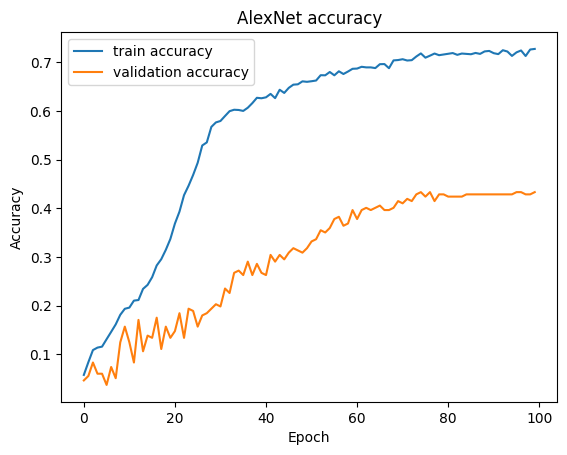

In [11]:
alex_net_wrapper.plot_accuracy()

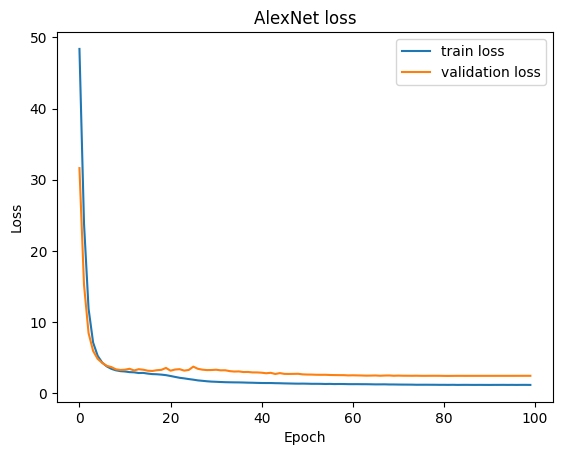

In [12]:
alex_net_wrapper.plot_loss()

20/20 [==============================] - 0s 8ms/step - loss: 2.6867 - accuracy: 0.3748
Loss: 2.6867
Accuracy: 0.3748
20/20 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.22      0.26        23
           1       0.32      0.24      0.27        25
           2       0.59      0.63      0.61        52
           3       0.24      0.32      0.27        38
           4       0.28      0.30      0.29        27
           5       0.26      0.40      0.32        35
           6       0.30      0.24      0.27        45
           7       0.00      0.00      0.00        10
           8       0.40      0.17      0.24        12
           9       0.14      0.09      0.11        11
          10       0.56      0.43      0.49        23
          11       0.56      0.58      0.57        26
          12       0.34      0.41      0.37        32
          13       0.30      0.47      0.37       

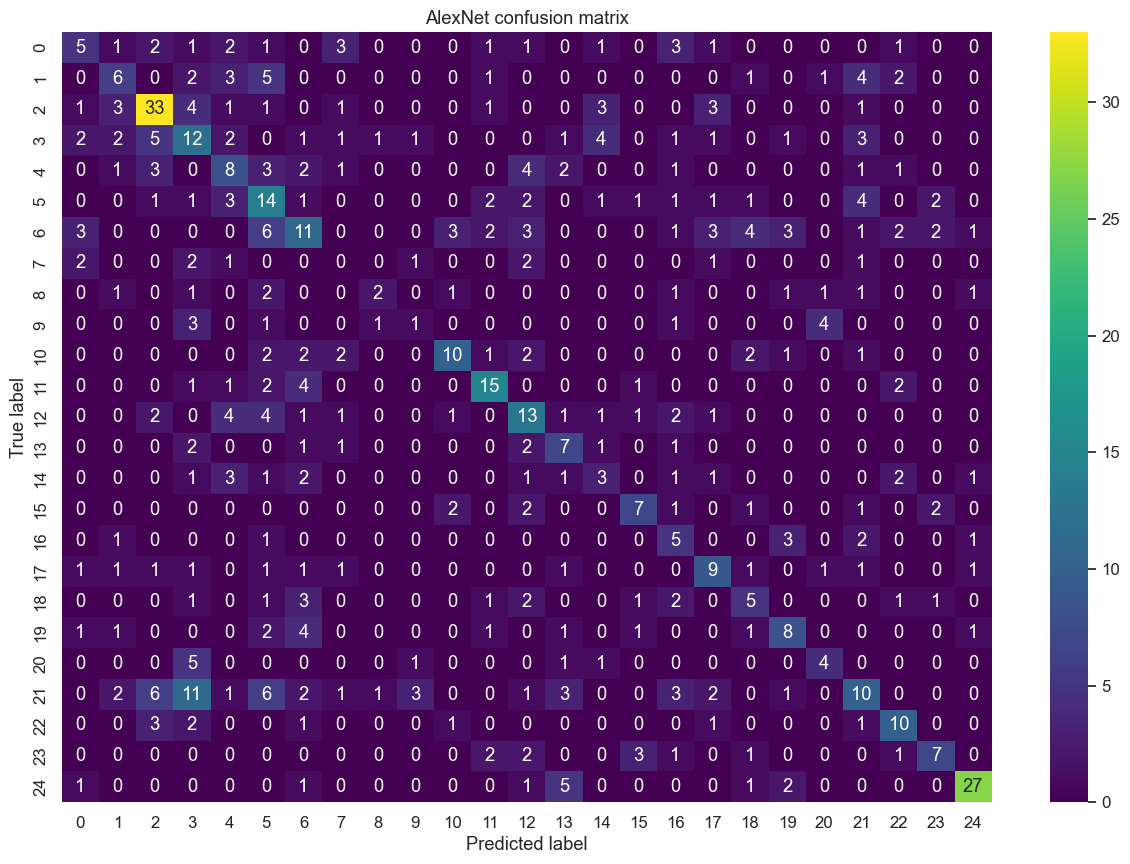

In [13]:
alex_net_wrapper.display_evaluation_results()